In [60]:


%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [61]:
# Load US Census Tracts
us_tracts = pd.read_csv('./data/us_tracts.csv', index_col=0)
us_tracts.head()

tract        lat        lon
0  1005950300  31.790893 -85.567051
1  1005950900  31.846722 -85.146233
2  1005950800  31.920693 -85.176032
3  1005950700  31.944085 -85.262084
4  1005950600  31.878353 -85.272921

In [62]:
# Merge with US Census Data
census = pd.read_csv("data/census.csv", index_col = 0)
census.head()

CensusTract    State   County  Urban  POP2010  OHU2010  GroupQuartersFlag  \
0   1001020100  Alabama  Autauga      1     1912      693                  0   
1   1001020200  Alabama  Autauga      1     2170      743                  0   
2   1001020300  Alabama  Autauga      1     3373     1256                  0   
3   1001020400  Alabama  Autauga      1     4386     1722                  0   
4   1001020500  Alabama  Autauga      1    10766     4082                  0   

   NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  TractBlack  TractAsian  \
0         0  0.000000                  0  ...         217          14   
1       181  0.083410                  0  ...        1217           5   
2         0  0.000000                  0  ...         647          17   
3         0  0.000000                  0  ...         193          18   
4       181  0.016812                  0  ...        1437         296   

   TractNHOPI  TractAIAN  TractOMultir  TractHispanic  TractHUNV  TractSNAP  \
0           0         14            45             44         26        112   
1           0          5            55             75         87        202   
2           5         11           117             87        108        120   
3           4         11            74             85         19         82   
4           9         48           310            355        198        488   

   la_flag  fd_flag  
0        1        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0  

[5 rows x 149 columns]

In [63]:
merge = census.merge(us_tracts, left_on='CensusTract', right_on='tract')

In [64]:
merge.shape

(72864, 152)

In [65]:
# Separate Alaska and Hawaii for easier visualization
alaska = merge[merge['State'] == "Alaska"]
hawaii = merge[merge['State'] == 'Hawaii']
mainland = merge[(merge.State != "Hawaii") & (merge.State != "Alaska")]

In [66]:
mainland.shape

(72365, 152)

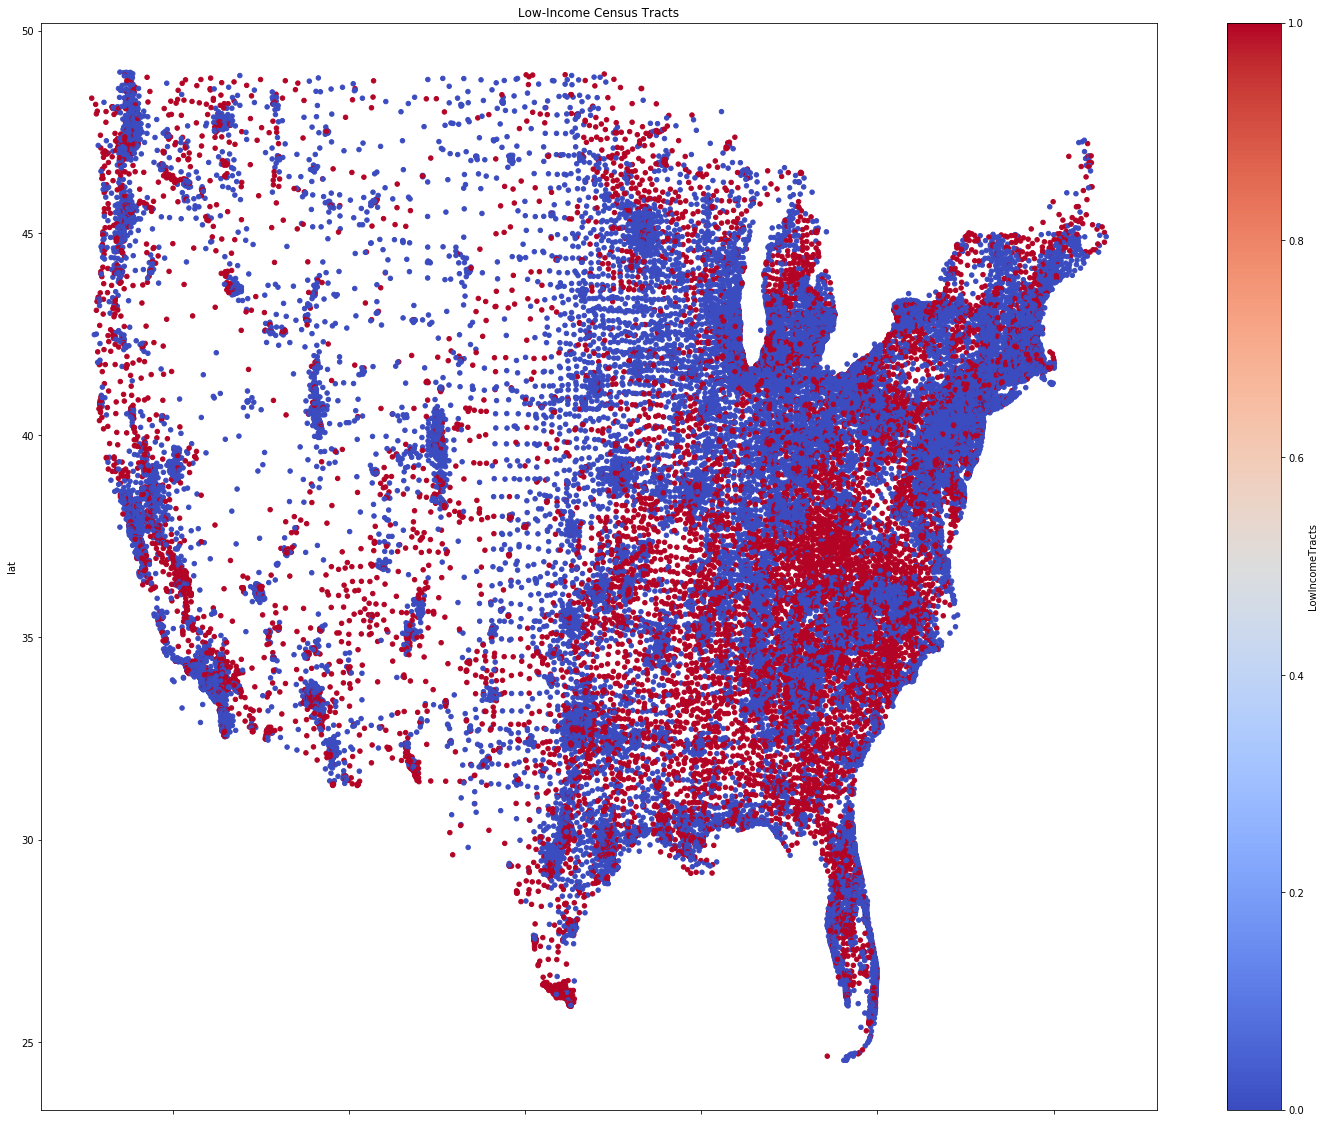

In [67]:
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'LowIncomeTracts',
              cmap = 'coolwarm',
              title = 'Low-Income Census Tracts',
              figsize = (25,20));

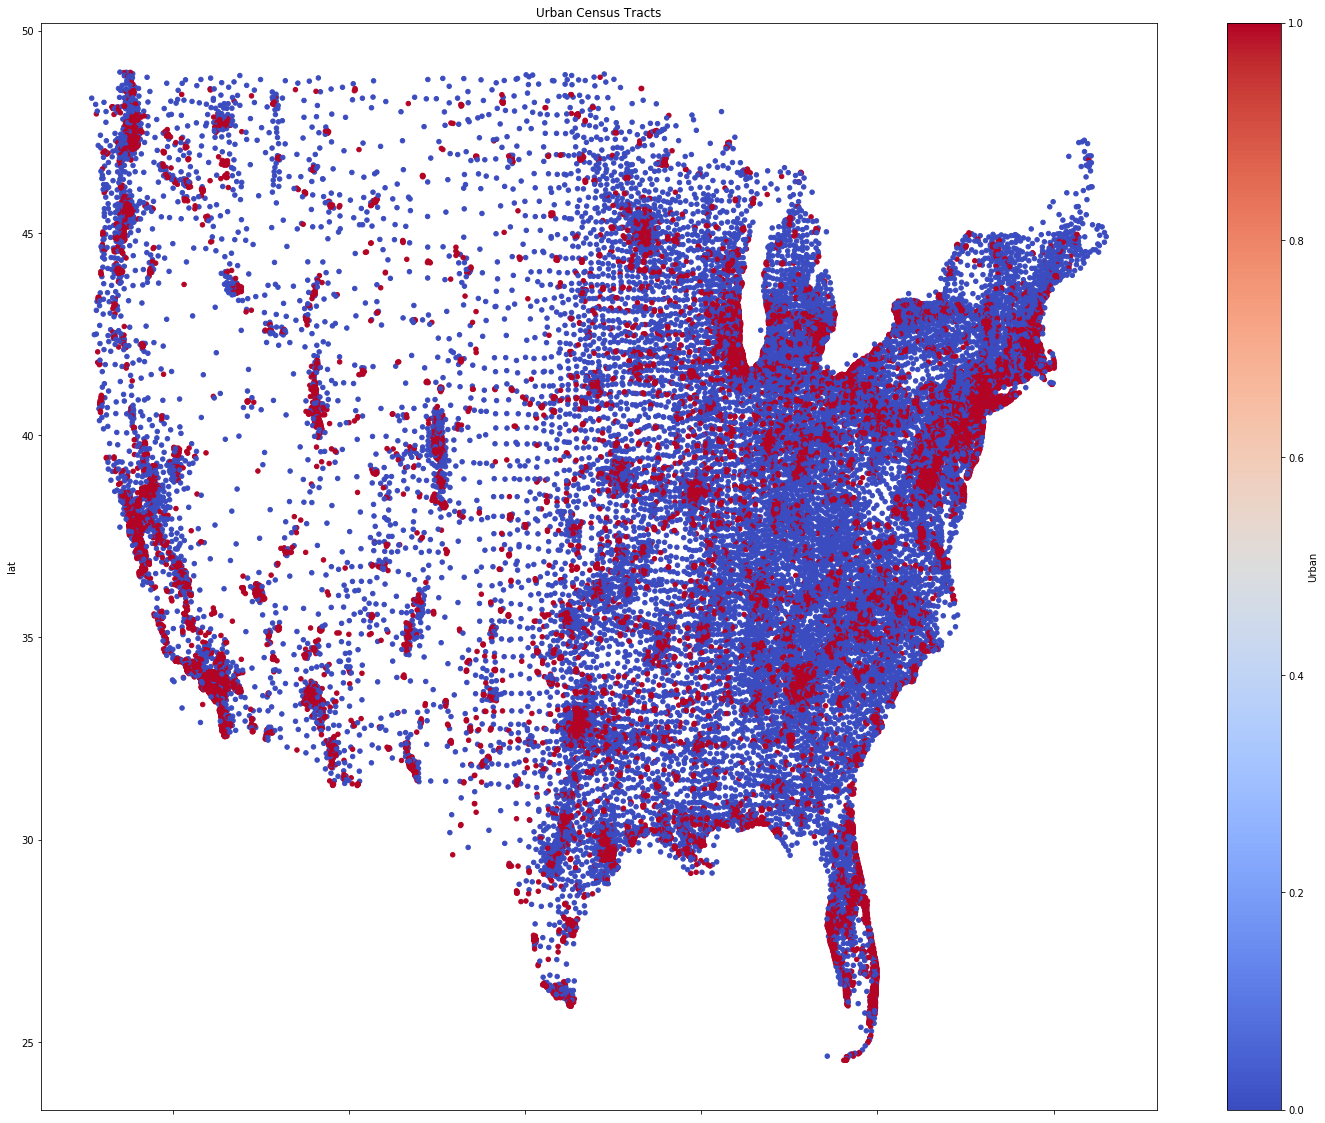

In [68]:
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'Urban',
              cmap = 'coolwarm',
              title = 'Urban Census Tracts',
              figsize = (25,20));

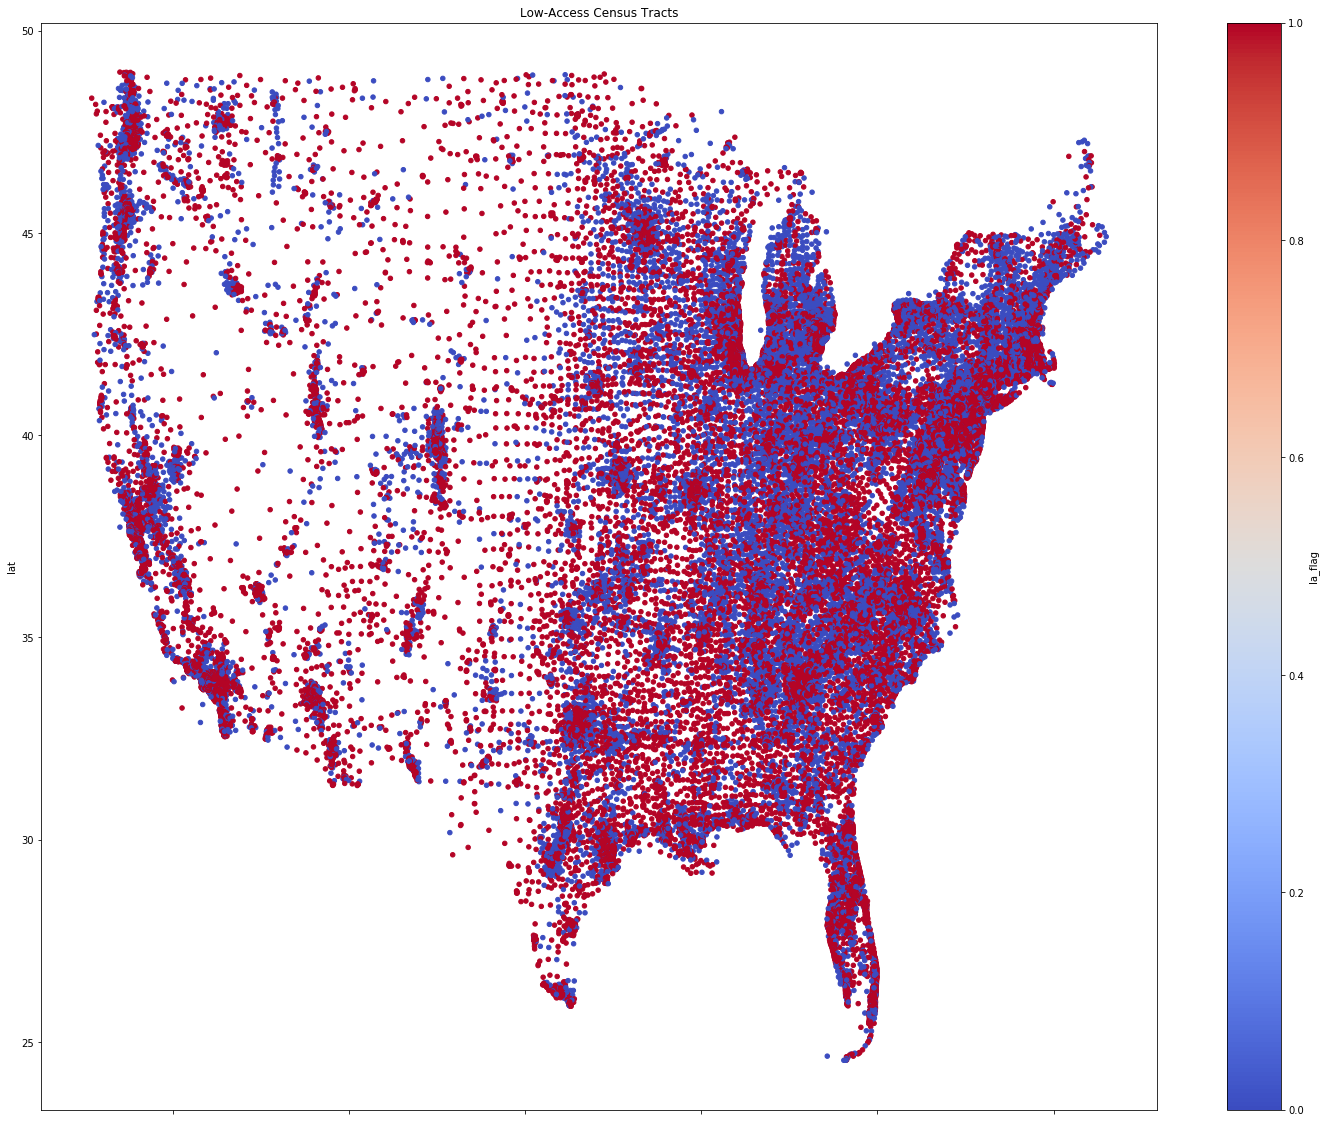

In [69]:
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'la_flag',
              cmap = 'coolwarm',
              title = 'Low-Access Census Tracts',
              figsize = (25,20));

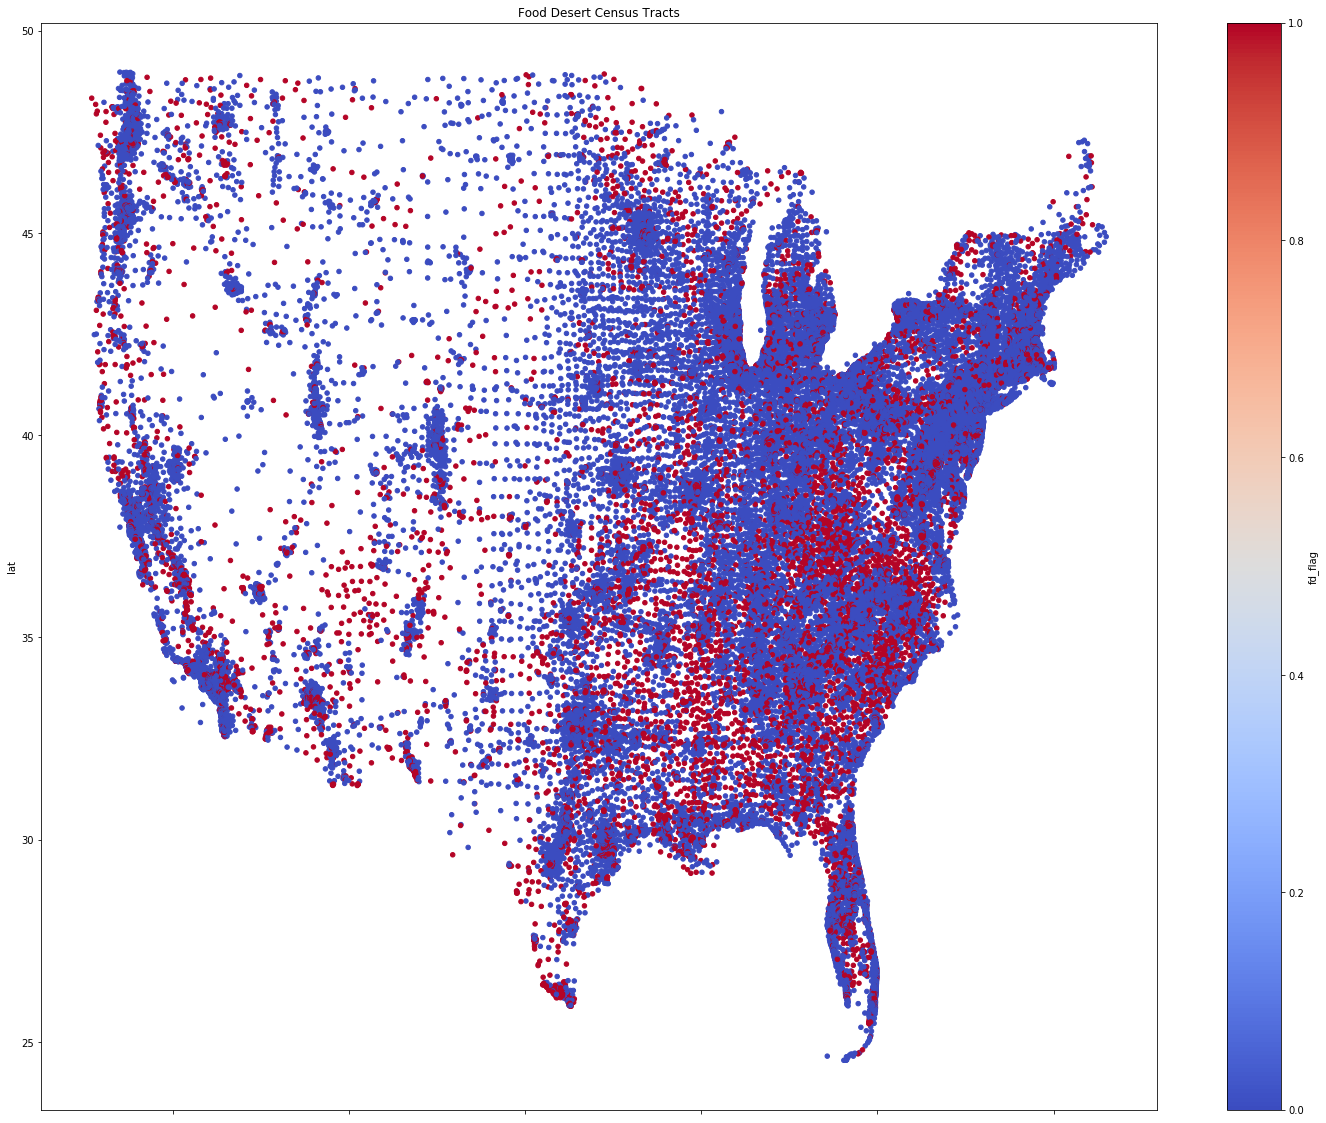

In [71]:
mainland.plot(kind = 'scatter' , x= 'lon', y= 'lat', c = 'fd_flag',
              cmap = 'coolwarm',
              title = 'Food Desert Census Tracts',
              figsize = (25,20));